### **FILTERING**

In [1]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/sample_data/sample_coil.xlsx')

# Print the column names
print("Column names:")
print(df.columns)

Column names:
Index(['date', 'forex', 'inflation', 'sp500', 'EPU'], dtype='object')


In [3]:
df['forex_returns'] = df['forex'].pct_change() * 100
df = df.dropna(subset=['forex_returns'])
print(df[['date', 'forex', 'forex_returns']].head())

        date  forex  forex_returns
1 2025-01-02  16012      -1.397869
2 2025-01-03  16452       2.747939
3 2025-01-04  16580       0.778021
4 2025-01-05  16158      -2.545235
5 2025-01-06  16665       3.137765


In [4]:
X = df[['inflation', 'sp500', 'EPU']]
y = df['forex_returns']

print("Independent variables (X) head:")
print(X.head())
print("\nDependent variable (y) head:")
print(y.head())

Independent variables (X) head:
   inflation      sp500       EPU
1          2  31.986455  0.815680
2          2  77.828096  0.044434
3          1  24.750659  0.080000
4          3  48.082656  0.904522
5          3  34.993103  0.085000

Dependent variable (y) head:
1   -1.397869
2    2.747939
3    0.778021
4   -2.545235
5    3.137765
Name: forex_returns, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (291, 3)
Shape of X_test: (73, 3)
Shape of y_train: (291,)
Shape of y_test: (73,)


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model with random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Feature Importance - Feature Zoo

In [7]:
importances = rf_model.feature_importances_
print("Feature Importances:")
print(importances)

Feature Importances:
[0.10027246 0.31076877 0.58895877]


In [8]:
import pandas as pd

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances (sorted):")
print(feature_importances_df)

Feature Importances (sorted):
     Feature  Importance
2        EPU    0.588959
1      sp500    0.310769
0  inflation    0.100272


## OLS Regression

In [9]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

print("Statsmodels library imported and constant added to X_train.")
print("Shape of X_train_const:", X_train_const.shape)
print("Head of X_train_const:\n", X_train_const.head())

Statsmodels library imported and constant added to X_train.
Shape of X_train_const: (291, 4)
Head of X_train_const:
      const  inflation      sp500       EPU
211    1.0          2  78.765520  0.914116
340    1.0          2  81.594343  0.729119
300    1.0          2  66.075859  0.085000
76     1.0          3  18.650664  0.113238
85     1.0          2  89.957414  0.766341


In [10]:
ols_model = sm.OLS(y_train, X_train_const)
ols_model_results = ols_model.fit(cov_type='HC1')

print("OLS model fitted with robust standard errors.")

OLS model fitted with robust standard errors.


In [11]:
X = df[['inflation', 'EPU']]
y = df['forex_returns']

print("Independent variables (X) head:")
print(X.head())
print("\nDependent variable (y) head:")
print(y.head())

Independent variables (X) head:
   inflation       EPU
1          2  0.815680
2          2  0.044434
3          1  0.080000
4          3  0.904522
5          3  0.085000

Dependent variable (y) head:
1   -1.397869
2    2.747939
3    0.778021
4   -2.545235
5    3.137765
Name: forex_returns, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (291, 2)
Shape of X_test: (73, 2)
Shape of y_train: (291,)
Shape of y_test: (73,)


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model with random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


In [14]:
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances (sorted):")
print(feature_importances_df)

Feature Importances (sorted):
     Feature  Importance
1        EPU    0.893878
0  inflation    0.106122


## LASSO

In [15]:
X_lasso = df[['inflation', 'sp500', 'EPU']]
y_lasso = df['forex_returns']

print("Independent variables for Lasso (X_lasso) head:")
print(X_lasso.head())
print("\nDependent variable for Lasso (y_lasso) head:")
print(y_lasso.head())

Independent variables for Lasso (X_lasso) head:
   inflation      sp500       EPU
1          2  31.986455  0.815680
2          2  77.828096  0.044434
3          1  24.750659  0.080000
4          3  48.082656  0.904522
5          3  34.993103  0.085000

Dependent variable for Lasso (y_lasso) head:
1   -1.397869
2    2.747939
3    0.778021
4   -2.545235
5    3.137765
Name: forex_returns, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

print("Shape of X_train_lasso:", X_train_lasso.shape)
print("Shape of X_test_lasso:", X_test_lasso.shape)
print("Shape of y_train_lasso:", y_train_lasso.shape)
print("Shape of y_test_lasso:", y_test_lasso.shape)

Shape of X_train_lasso: (291, 3)
Shape of X_test_lasso: (73, 3)
Shape of y_train_lasso: (291,)
Shape of y_test_lasso: (73,)


In [17]:
from sklearn.linear_model import Lasso

# Instantiate a Lasso Regressor model with alpha=1.0 and fit_intercept=False
lasso_model = Lasso(alpha=1.0, fit_intercept=False, random_state=42)

# Train the model using the training data
lasso_model.fit(X_train_lasso, y_train_lasso)

print("Lasso Regressor model trained successfully without intercept.")

Lasso Regressor model trained successfully without intercept.


## Principal Component Analysis

In [18]:
X_pca = df[['inflation', 'sp500', 'EPU']]
print("Independent variables for PCA (X_pca) head:")
print(X_pca.head())

Independent variables for PCA (X_pca) head:
   inflation      sp500       EPU
1          2  31.986455  0.815680
2          2  77.828096  0.044434
3          1  24.750659  0.080000
4          3  48.082656  0.904522
5          3  34.993103  0.085000


In [19]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_pca_scaled = scaler.fit_transform(X_pca)

# Convert the scaled data back to a DataFrame for better readability, maintaining column names
X_pca_scaled_df = pd.DataFrame(X_pca_scaled, columns=X_pca.columns, index=X_pca.index)

print("Scaled independent variables for PCA (X_pca_scaled_df) head:")
print(X_pca_scaled_df.head())

Scaled independent variables for PCA (X_pca_scaled_df) head:
   inflation     sp500       EPU
1  -0.209718 -0.713868  1.274275
2  -0.209718  0.933544 -1.290884
3  -1.503568 -0.973901 -1.172591
4   1.084133 -0.135418  1.569764
5   1.084133 -0.605818 -1.155961


In [20]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., 2 for visualization or based on explained variance)
pca = PCA(n_components=2, random_state=42)

# Fit PCA to the scaled data and transform it
X_pca_transformed = pca.fit_transform(X_pca_scaled_df)

# Convert the transformed data into a DataFrame for better readability
X_pca_transformed_df = pd.DataFrame(data=X_pca_transformed, columns=['Principal Component 1', 'Principal Component 2'], index=X_pca_scaled_df.index)

print("Principal components after PCA transformation (X_pca_transformed_df) head:")
print(X_pca_transformed_df.head())

Principal components after PCA transformation (X_pca_transformed_df) head:
   Principal Component 1  Principal Component 2
1              -1.171886               0.026987
2               0.957237               0.143907
3              -0.689169              -1.469399
4              -0.231137               0.705661
5               1.274668              -1.082971


In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:")
print(explained_variance_ratio)

# Optionally, print the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative explained variance ratio:")
print(cumulative_explained_variance)

Explained variance ratio of each principal component:
[0.37590803 0.33518437]

Cumulative explained variance ratio:
[0.37590803 0.7110924 ]


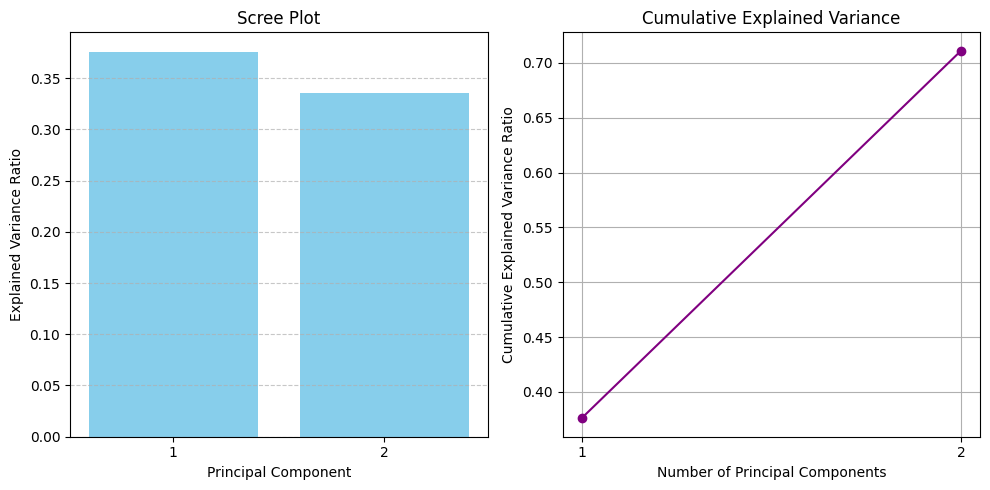

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of component numbers for plotting
components = range(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(10, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.bar(components, explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(components)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(components, cumulative_explained_variance, marker='o', linestyle='-', color='purple')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.xticks(components)
plt.grid(True)

plt.tight_layout()
plt.show()


In [23]:
X_pca_revised = df[['inflation', 'sp500']]
print("Independent variables for PCA (Revised) head:")
print(X_pca_revised.head())

Independent variables for PCA (Revised) head:
   inflation      sp500
1          2  31.986455
2          2  77.828096
3          1  24.750659
4          3  48.082656
5          3  34.993103


In [24]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler_revised = StandardScaler()

# Fit the scaler to the data and transform it
X_pca_scaled_revised = scaler_revised.fit_transform(X_pca_revised)

# Convert the scaled data back to a DataFrame for better readability, maintaining column names
X_pca_scaled_revised_df = pd.DataFrame(X_pca_scaled_revised, columns=X_pca_revised.columns, index=X_pca_revised.index)

print("Scaled independent variables for PCA (Revised) head:")
print(X_pca_scaled_revised_df.head())

Scaled independent variables for PCA (Revised) head:
   inflation     sp500
1  -0.209718 -0.713868
2  -0.209718  0.933544
3  -1.503568 -0.973901
4   1.084133 -0.135418
5   1.084133 -0.605818


In [25]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components, as we have two original features
pca_revised = PCA(n_components=2, random_state=42)

# Fit PCA to the scaled data and transform it
X_pca_transformed_revised = pca_revised.fit_transform(X_pca_scaled_revised_df)

# Get the loading factors (eigenvectors)
loading_factors_revised = pca_revised.components_

# Create a DataFrame for better readability
loading_factors_df = pd.DataFrame(
    loading_factors_revised,
    columns=X_pca_scaled_revised_df.columns,
    index=['Principal Component 1', 'Principal Component 2']
)

print("Loading Factors:")
print(loading_factors_df)


Loading Factors:
                       inflation     sp500
Principal Component 1   0.707107  0.707107
Principal Component 2  -0.707107  0.707107


In [26]:
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances (sorted):")
print(feature_importances_df)

Feature Importances (sorted):
     Feature  Importance
1        EPU    0.893878
0  inflation    0.106122
